# SHAPによるiris分類モデルの可視化

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データセットの取得

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris['feature_names']
target_names = iris.target_names

#2項分類のサンプルにするためsetosaを削除する
#X = X[y != 0]
#y = y[y != 0]
#y = y -1
#target_names = target_names[1:]

print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['setosa' 'versicolor' 'virginica']
X_train.shape =  (120, 4)
y_train.shape =  (120,)
X_test.shape =  (30, 4)
y_test.shape =  (30,)


# モデルの学習と評価

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = sklearn.ensemble.RandomForestClassifier(n_estimators=2, max_depth = 3, random_state=2)
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.9666666666666667

# テストデータの確認

In [4]:
data_index = 1
y_index = y_test[data_index]
print('target name = ' + target_names[y_index])
pd.DataFrame([X_test[data_index]], columns=feature_names)

target name = setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.7,3.8,1.7,0.3


In [5]:
X_train_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

y_label = []
for i in y_train:
    y_label.append(target_names[i])
y_train_dataframe = pd.DataFrame(y_label, columns=['result'])

train_dataframe = pd.concat([X_train_dataframe, y_train_dataframe], axis=1)

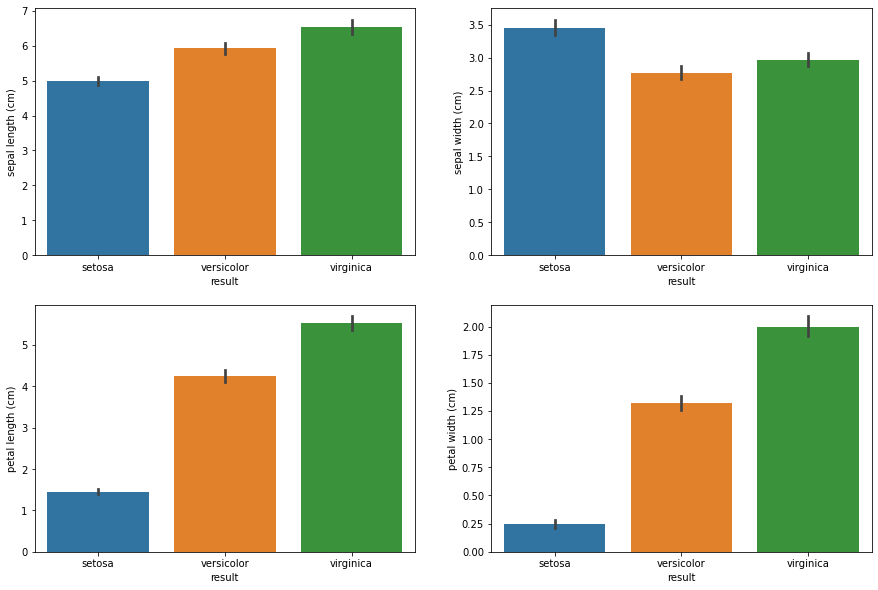

In [6]:
import seaborn as sns

fig = plt.figure(figsize=[15,10])
for i, f in enumerate(iris['feature_names']):
    fig.add_subplot(2, 2, i+1)
    sns.barplot(y=f, x='result', data= train_dataframe)

# SHAPによるモデルの可視化

In [7]:
import shap

exp = shap.TreeExplainer(model)
shap_values = exp.shap_values(X_test)
#shap_values = shap_values[y_index]

print('exp.expected_value.shape = ', exp.expected_value.shape)
print('shap_values.shape = ', shap_values[y_index].shape)
print('X_test.shape = ', X_test.shape)
print('')
print('exp.expected_value = ', exp.expected_value)
print('shap_values = ', shap_values[y_index][data_index])
print('X_test = ', X_test[data_index])

exp.expected_value.shape =  (3,)
shap_values.shape =  (30, 4)
X_test.shape =  (30, 4)

exp.expected_value =  [0.37916667 0.30416667 0.31666667]
shap_values =  [0.         0.         0.31666667 0.30416667]
X_test =  [5.7 3.8 1.7 0.3]


## 各特徴量の重要度合いを可視化

各特徴量が分類にどの程度重要な役割を果たしているのかを確認する

SHAP値の値の大きさが指標になる

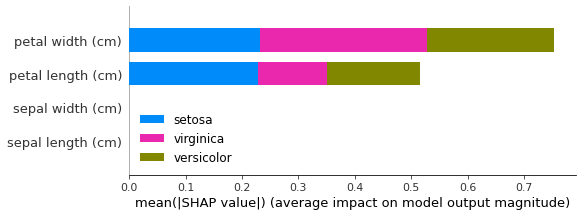

In [8]:
shap.summary_plot(shap_values=shap_values,
                  features=X_test,
                  feature_names=feature_names,
                  class_names=target_names)

上記はデータ全体の傾向を示しているが、各データについて確認することも可能

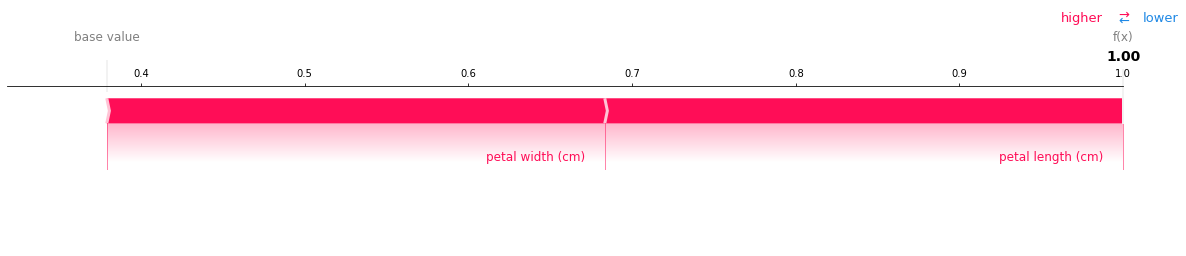

In [9]:
shap.force_plot(exp.expected_value[y_index],
                shap_values[y_index][data_index],
                feature_names=feature_names,
                matplotlib=True)

これらの値はShap値が元になっている

In [10]:
pd.DataFrame([shap_values[y_index][data_index]], index=['sharp value'], columns=feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sharp value,0.0,0.0,0.316667,0.304167


# 各特徴量とSHAP値の相関関係

各特徴量とその特徴量が与えるSHAP値の関係を表示する

結果より、sepal length, sepal widthはそれぞれのSHAP値にあまり相関がなく、

petal length, petal widthはそれぞれのSHAP値と負の相関がある

各プロットのヒートマップは他の特徴量の大きさを表しているため、petal lengthのグラフを確認すると、
petal widthと関係性がありそうなことがこのグラフだけからわかる

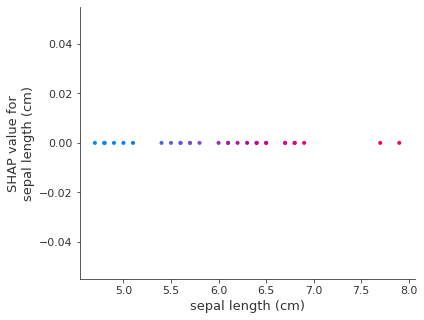

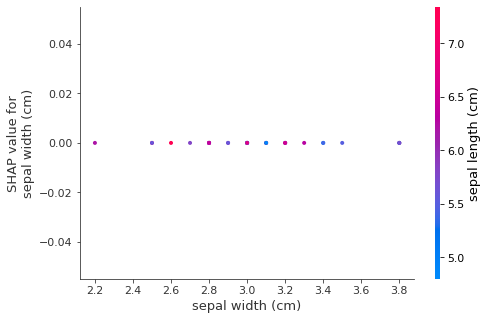

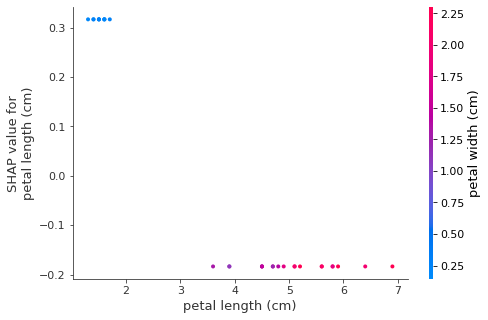

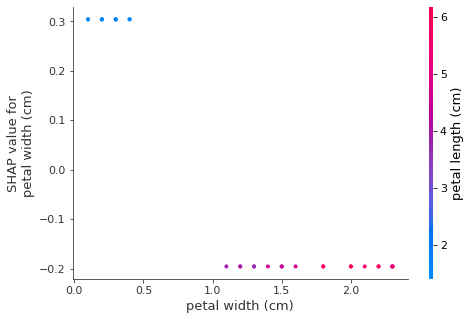

In [11]:
for i in range(len(feature_names)):
    shap.dependence_plot(i, 
                         shap_values[y_index], 
                         features=X_test,
                         feature_names=feature_names)